In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os

In [95]:
def plot_average_histories(folder_name,title, keys):
    histories = [pickle.load(open(historyPath, "rb")) for historyPath in glob.glob(f'{"histories/"+ folder_name}/*.pt')]
    num_episodes = len(histories[0][keys[0]])
    fig = plt.figure(figsize = (20,5))
    plot_position = 1
    n_plots = (len(keys))
    plot_color =  {    
    'numCoinsCollected' : "orange",
    'num_coins_collected': "orange",
    'num_waited': "pink",
    'num_bombs_dropped': "black",
    'cumulative_reward' : "green",
    'num_crates_destroyed' : "peru",
    'roundLength'    : "steelblue",
    'round_length'    : "steelblue",
    'num_invalid_actions': "red",
    'cumulative_reward': "orange"
   
    }
        
    for x in keys:
        array = np.stack([np.array(history[x]) for history in histories])
        mean_array = np.mean(array, axis=0)
        plt.subplot(1,n_plots,plot_position)
        plt.plot(np.arange(num_episodes), mean_array, label= x, color = plot_color[x])
        plt.xlabel("Episodes")
        plt.ylabel(x)
        plot_position += 1
        plt.legend(loc=1)
    fig.suptitle(title, fontsize=18)
    return plt.show()

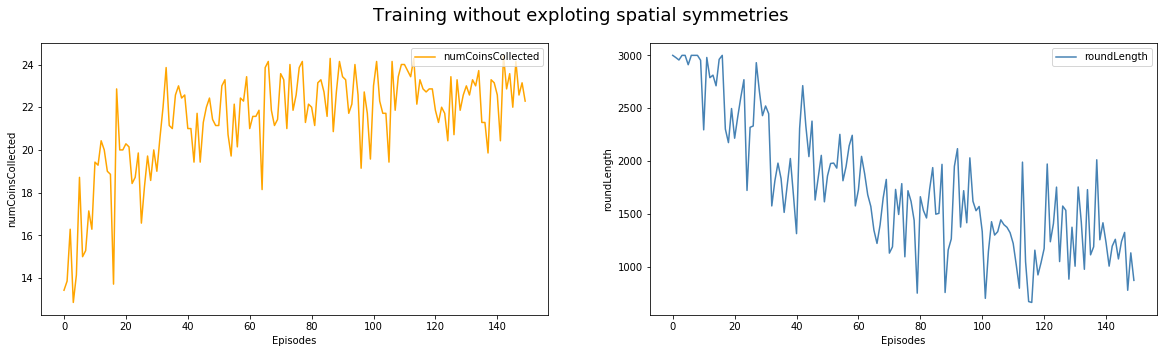

In [81]:
plot_average_histories("linear_agent_4_look_around_without_mirroring",'Training without exploting spatial symmetries',['numCoinsCollected','roundLength'])


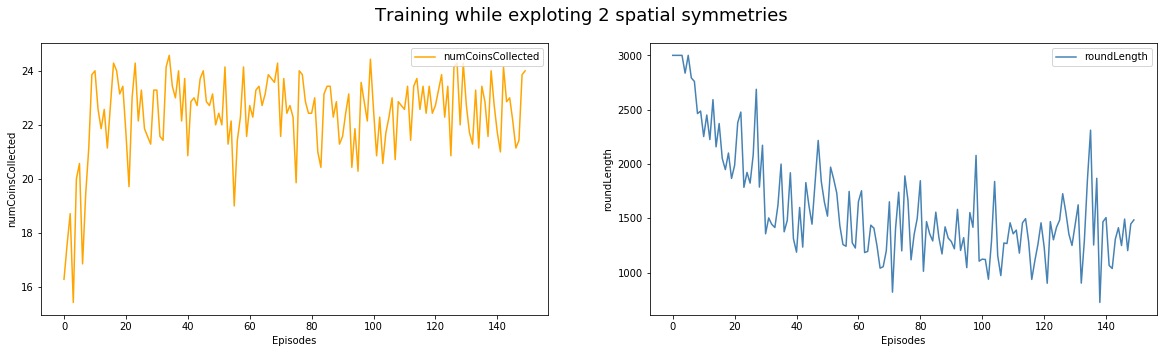

In [83]:
plot_average_histories("linear_agent_4_look_around_with_mirroring",'Training while exploting 2 spatial symmetries',['numCoinsCollected','roundLength'])

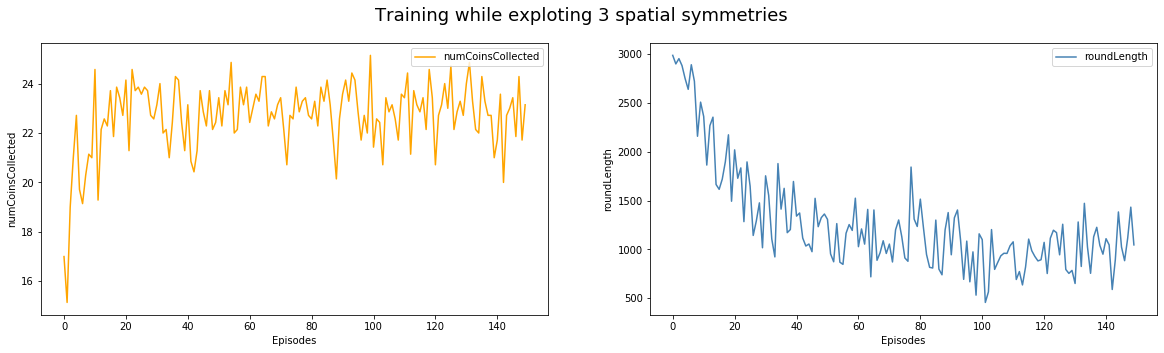

In [85]:
plot_average_histories("linear_agent_4_look_around_with_extensive_mirroring_unique_coin_identifiers",'Training while exploting 3 spatial symmetries',['numCoinsCollected','roundLength'])

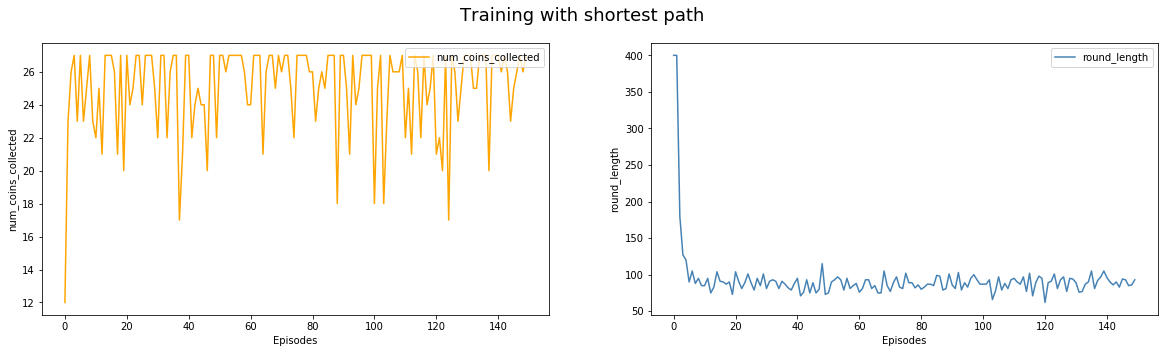

In [96]:
plot_average_histories('coin_collecting','Training with shortest path',['num_coins_collected','round_length'])